![picture](https://drive.google.com/uc?id=1ubytUlv4ZmpevmXkYrF5KVcXdvHOhFRI)

# **Import Dependencies**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re


from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# **Data Collection & EDA**

In [ ]:
# Loading the dataset into a pandas dataframe.
news_df = pd.read_csv('/content/drive/MyDrive/ML Projects Workflow/fake_news_train.csv')

In [ ]:
news_df.head()  #check the first five rows

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
news_df.shape #check the number of rows and columns

(20800, 5)

In [ ]:
news_df.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [ ]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


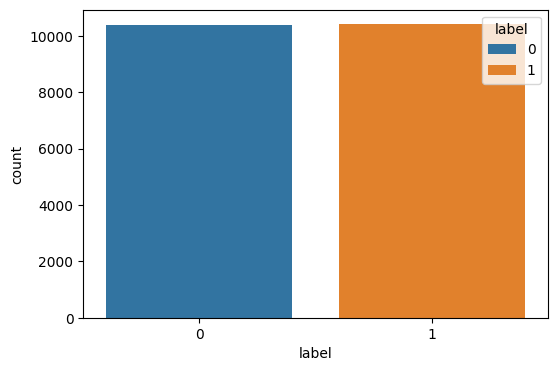

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='label',data= news_df, hue='label')
plt.show()

In [ ]:
# checking the number of missing values
news_df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
missing_data_prct = round((news_df.isnull().sum()/news_df.count())*100,2)
missing_data_prct

id         0.00
title      2.76
author    10.39
text       0.19
label      0.00
dtype: float64

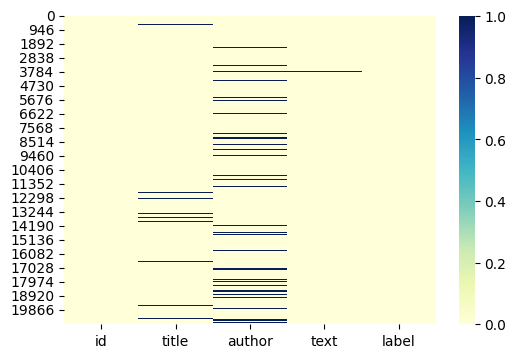

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(data= news_df.isnull(),cmap="YlGnBu")
plt.show()

`Note: We will deal with the missing data either by dropping them or imputing null values.`

In [ ]:
# replacing the null values with empty string
news_df = news_df.fillna('')

In [ ]:
news_df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [ ]:
# merging the author name and news title
news_df['content'] = news_df['author']+' '+news_df['title']

In [ ]:
news_df['content']

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object

# **Stemming**

`Stemming is the process of reducing a word to its root word. This is done by removing the prefixes and suffixes from the word.`
- Example: actor, actress, acting ---> act

In [ ]:
port_stem = PorterStemmer()

In [ ]:
def stemming(content):
  stemmed_content = re.sub('[^a-zA-Z]',' ', content)
  stemmed_content = stemmed_content.lower()
  stemmed_content = stemmed_content.split()
  stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content = ' '.join(stemmed_content)
  return stemmed_content

In [ ]:
news_df['content'] = news_df['content'].apply(stemming)

In [ ]:
print(news_df['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


In [ ]:
# separating the data and label
X = news_df['content'].values
y = news_df['label'].values

In [ ]:
print(X)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']


In [ ]:
print(y)

[1 0 1 ... 0 1 1]


In [ ]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [ ]:
print(X)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

# **Splitting Dataset to training and test data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(20800, 17128) (16640, 17128) (4160, 17128)


# **Training Model : Logistic Regression**

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

# **Evaluation**

# 1. **Accuracy Score**

In [ ]:
# accuracy on the training data
X_train_pred = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_pred,y_train)

In [ ]:
print('Accuracy on training data: {}%'.format(round((training_data_accuracy*100),2)))

Accuracy on training data: 98.66%


In [ ]:
# accuracy on the test data
X_test_pred = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_pred, y_test)

In [ ]:
print('Accuracy on test data: {}%'.format(round((test_data_accuracy*100),2)))

Accuracy on test data: 97.91%


# 2. **Log Loss**

In [ ]:
from sklearn.metrics import log_loss
ll_model1 = log_loss(y_test,X_test_pred)

In [ ]:
ll_model1  #more loss-worst model, less loss-best model.

0.7537975588589407

# 3. **Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
cm_model1 = confusion_matrix(y_test, X_test_pred)

In [ ]:
cm_model1

array([[2004,   73],
       [  14, 2069]])

# 4. **Classification Report**

In [ ]:
from sklearn.metrics import classification_report
cr_model1 = classification_report(y_test,X_test_pred)

In [ ]:
print(cr_model1)

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2077
           1       0.97      0.99      0.98      2083

    accuracy                           0.98      4160
   macro avg       0.98      0.98      0.98      4160
weighted avg       0.98      0.98      0.98      4160



# 5. **Area Under ROC**

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr_model1, tpr_model1, threshold_model1 = roc_curve(y_test, X_test_pred)
print('roc_auc_score_model1: ',roc_auc_score(y_test, X_test_pred))

roc_auc_score_model1:  0.9790660391074223


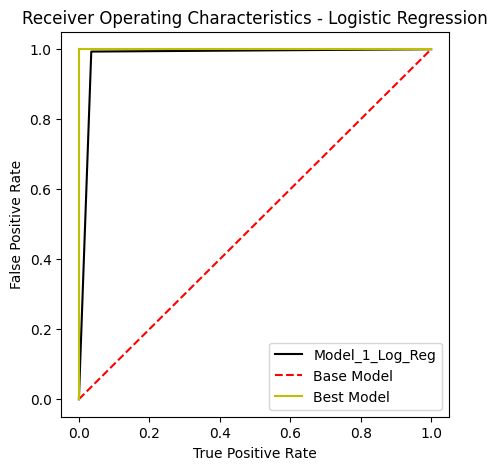

In [ ]:
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristics - Logistic Regression')
plt.plot(fpr_model1, tpr_model1, label="Model_1_Log_Reg", c='black')
plt.plot([0,1],ls="--",c='red', label="Base Model")
plt.plot([1,1],c='y'),plt.plot([0,0],[1,0],c='y',label='Best Model')
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.legend()
plt.show()

# **Making a Predictive System**

In [ ]:
X_new = X_test[0]

prediction = model.predict(X_new)

print(y_test[0])

print(prediction)

print("Real News" if prediction[0]==0 else "Fake News")


1
[1]
Fake News
